# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [54]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [55]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#lat_range = (-5, 5)
#lng_range = (-5, 5)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [56]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
#cities = cities[0:1]
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #print(city_weather)



        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as err:
        print(f"City not found. Skipping... {str(err)}")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cape town
Processing Record 2 of Set 1 | illoqqortoormiut
City not found. Skipping... 'coord'
Processing Record 3 of Set 1 | saint marys
Processing Record 4 of Set 1 | sao filipe
Processing Record 5 of Set 1 | toliary
City not found. Skipping... 'coord'
Processing Record 6 of Set 1 | ostrovnoy
Processing Record 7 of Set 1 | victoria
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | saint-philippe
Processing Record 10 of Set 1 | barrow
Processing Record 11 of Set 1 | nikolskoye
Processing Record 12 of Set 1 | cidreira
Processing Record 13 of Set 1 | deyang
Processing Record 14 of Set 1 | dikson
Processing Record 15 of Set 1 | bambous virieux
Processing Record 16 of Set 1 | hilo
Processing Record 17 of Set 1 | luanda
Processing Record 18 of Set 1 | tezu
Processing Record 19 of Set 1 | tuatapere
Processing Record 20 of Set 1 | carnarvon
Processing Record 21 of Set 1 | orlik
Proces

In [57]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [58]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cape town,-33.9258,18.4232,21.23,82,0,8.23,ZA,1675625196
1,saint marys,30.7305,-81.5465,23.03,83,100,1.79,US,1675625435
2,sao filipe,14.8961,-24.4956,21.71,62,98,6.29,CV,1675625543
3,ostrovnoy,68.0531,39.5131,-14.15,97,92,5.11,RU,1675625544
4,victoria,22.2855,114.1577,18.51,89,100,2.24,HK,1675625444


In [59]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [60]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cape town,-33.9258,18.4232,21.23,82,0,8.23,ZA,1675625196
1,saint marys,30.7305,-81.5465,23.03,83,100,1.79,US,1675625435
2,sao filipe,14.8961,-24.4956,21.71,62,98,6.29,CV,1675625543
3,ostrovnoy,68.0531,39.5131,-14.15,97,92,5.11,RU,1675625544
4,victoria,22.2855,114.1577,18.51,89,100,2.24,HK,1675625444


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

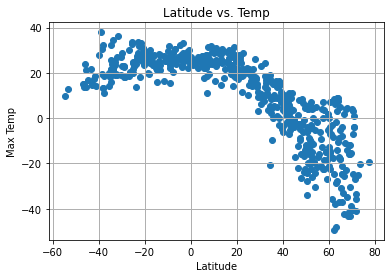

In [61]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o",label="Cities")
plt.grid(linestyle='-', linewidth=1, alpha = 1)


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs. Temp")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

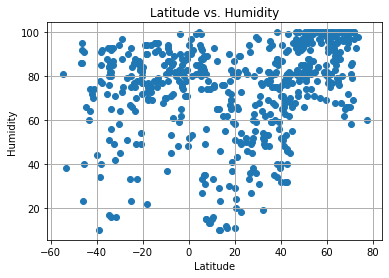

In [62]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o",label="Cities")
plt.grid(linestyle='-', linewidth=1, alpha = 1)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

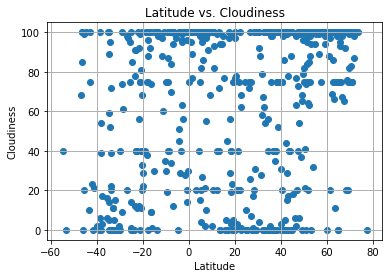

In [63]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o",label="Cities")
plt.grid(linestyle='-', linewidth=1, alpha = 1)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

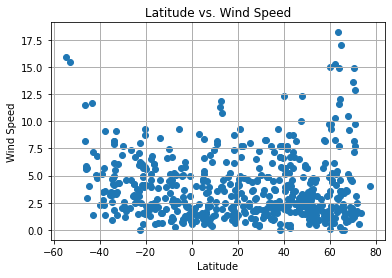

In [64]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o",label="Cities")
plt.grid(linestyle='-', linewidth=1, alpha = 1)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [65]:
# Define a function to create Linear Regression plots


In [66]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,saint marys,30.7305,-81.5465,23.03,83,100,1.79,US,1675625435
2,sao filipe,14.8961,-24.4956,21.71,62,98,6.29,CV,1675625543
3,ostrovnoy,68.0531,39.5131,-14.15,97,92,5.11,RU,1675625544
4,victoria,22.2855,114.1577,18.51,89,100,2.24,HK,1675625444
5,albany,42.6001,-73.9662,5.96,46,99,0.45,US,1675625420


In [67]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] <= 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cape town,-33.9258,18.4232,21.23,82,0,8.23,ZA,1675625196
6,saint-philippe,-21.3585,55.7679,26.77,87,92,4.86,RE,1675625545
9,cidreira,-30.1811,-50.2056,27.08,58,2,6.91,BR,1675625548
12,bambous virieux,-20.3428,57.7575,26.79,83,40,4.12,MU,1675625550
14,luanda,-8.8368,13.2343,27.00,78,40,4.12,AO,1675625551


###  Temperature vs. Latitude Linear Regression Plot

-0.8375591767659303


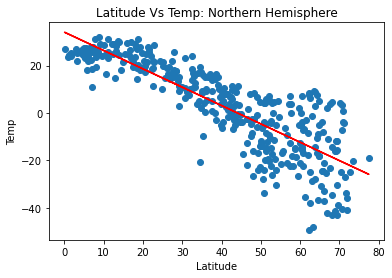

In [68]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

(slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values)
regressvalues = x_values * slope + intercept

line = "Y = " + str(round(slope,2)) + "x + " +str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regressvalues, "r-")

plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.title("Latitude Vs Temp: Northern Hemisphere")
print(r_value)


0.4672412703513073


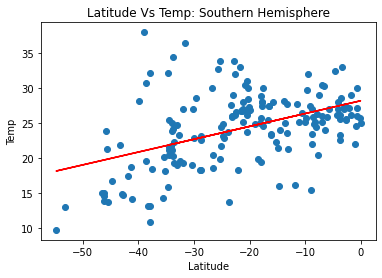

In [69]:
# Linear regression on Southern Hemisphere
# Linear regression on Northern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

(slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values)
regressvalues = x_values * slope + intercept

line = "Y = " + str(round(slope,2)) + "x + " +str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regressvalues, "r-")

plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.title("Latitude Vs Temp: Southern Hemisphere")
print(r_value)


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

0.4759680616817066


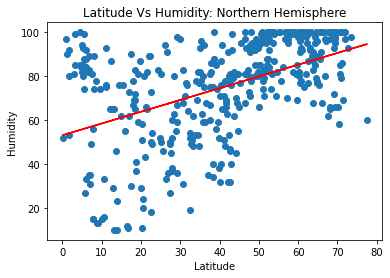

In [70]:
# Northern Hemisphere
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

(slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values)
regressvalues = x_values * slope + intercept

line = "Y = " + str(round(slope,2)) + "x + " +str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regressvalues, "r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Latitude Vs Humidity: Northern Hemisphere")
print(r_value)


0.21392934597570784


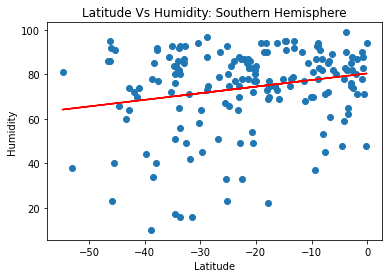

In [71]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

(slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values)
regressvalues = x_values * slope + intercept

line = "Y = " + str(round(slope,2)) + "x + " +str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regressvalues, "r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Latitude Vs Humidity: Southern Hemisphere")
print(r_value)


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

0.24817449008294493


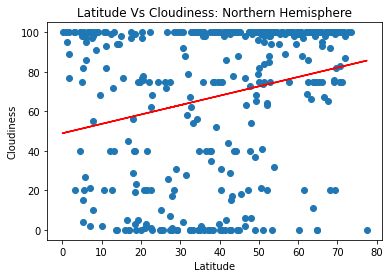

In [72]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

(slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values)
regressvalues = x_values * slope + intercept

line = "Y = " + str(round(slope,2)) + "x + " +str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regressvalues, "r-")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Latitude Vs Cloudiness: Northern Hemisphere")
print(r_value)

0.346679036160146


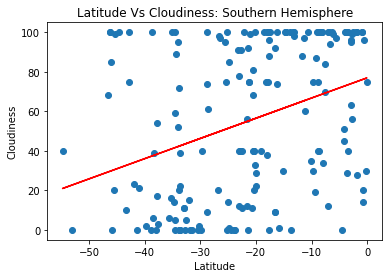

In [73]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

(slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values)
regressvalues = x_values * slope + intercept

line = "Y = " + str(round(slope,2)) + "x + " +str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regressvalues, "r-")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Latitude Vs Cloudiness: Southern Hemisphere")
print(r_value)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

0.09236490268685602


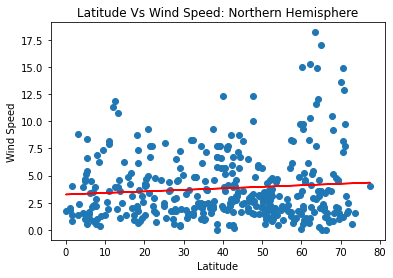

In [74]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

(slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values)
regressvalues = x_values * slope + intercept

line = "Y = " + str(round(slope,2)) + "x + " +str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regressvalues, "r-")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Latitude Vs Wind Speed: Northern Hemisphere")
print(r_value)

-0.411833238003764


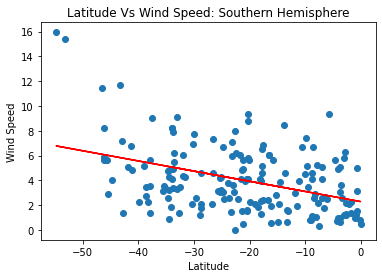

In [75]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

(slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values)
regressvalues = x_values * slope + intercept

line = "Y = " + str(round(slope,2)) + "x + " +str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regressvalues, "r-")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Latitude Vs Wind Speed: Southern Hemisphere")
print(r_value)

**Discussion about the linear relationship:** YOUR RESPONSE HERE